Best fit paramaters, thetas, thetar, psib and lambda [ 0.480829    0.13261645 75.52621701  1.85870107]
Predicted data [0.480829   0.480829   0.480829   ... 0.13265608 0.13265608 0.13265607]
Estimated covariance matrix of the paramters [[ 2.07366895e-06  1.07598535e-14 -2.41982737e-04  2.32279435e-13]
 [ 1.07598534e-14  1.30664460e-04  3.13925038e-03  1.48411457e-03]
 [-2.41982737e-04  3.13925038e-03  2.76691167e-01  4.71944673e-02]
 [ 2.32279435e-13  1.48411457e-03  4.71944673e-02  1.84426843e-02]]


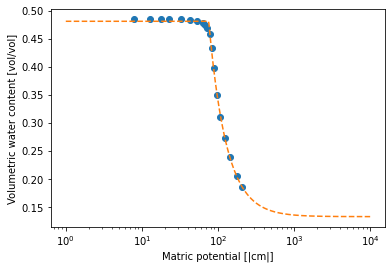

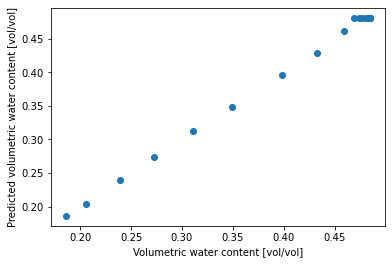

In [1]:
import numpy as np
from scipy.optimize import curve_fit, least_squares
import matplotlib.pyplot as plt

## Touchet Silt Loam from Brooks and Corey (1976)
phi = 0.485

S = np.array([1.00, 1.00, 1.00, 1.00, 0.998, 0.995, 0.992, 0.984, 0.978, 0.967, 0.946, 0.892, 0.821, 0.719, 0.641, 0.562, 0.492, 0.424, 0.383])
psi = np.array([7.8, 12.8, 17.8, 22.8, 32.8, 42.8, 52.8, 62.8, 67.8, 72.5, 77.8, 82.3, 87.7, 97.8, 107.6, 123.0, 142.6, 177.0, 207.2 ])

### Converts the data from effective saturation to volumetric water content
theta = S*phi

### Define initial parameters (Initial guess for the nonlinear regression procedure)
thetas = 0.5 
thetar = 0.2
psib = 20
lamb = 0.5

### Defines the piecewise nonlinear regression model to be fit
def bc(x, qs, qr, p, l):
    return np.piecewise(x, [(x <= p), (x > p)], [lambda x: qs, lambda x: qr + (qs - qr)*(p/x)**l])

### Puts the initial parametes into the "InitialParams" vector
InitPar = [thetas, thetar, psib, lamb]

### Curve fitting procedure - "lm" is the Leverberg-Marquardt algorithm
popt, pcov = curve_fit(bc, psi, theta, p0=InitPar, method='lm')

### Creates values of psi for plotting the predicted data    
xd = np.linspace(1, 10000, 10000)

### Uses the parameters from the fit to create the data for the predicted plot
thetap = np.where((xd >= popt[2]), popt[1] + (popt[0] - popt[1])*(popt[2]/xd)**popt[3], popt[0])

### Prints the data and parameters for checking
print("Best fit paramaters, thetas, thetar, psib and lambda", popt)     
print("Predicted data", thetap)
print("Estimated covariance matrix of the paramters", pcov)

### Plot of the data and best fit line
plt.plot(psi, theta, "o")
plt.plot(xd, thetap, "--")
plt.ylabel('Volumetric water content [vol/vol]')
plt.xlabel('Matric potential [|cm|]')
plt.xscale("log")
plt.show()

### Puts the predicted data on the same dimension as the original data
thetap2 = np.where((psi >= popt[2]), popt[1] + (popt[0] - popt[1])*(popt[2]/psi)**popt[3], popt[0])

### Plot predicted versus estimated volumetric water contents
plt.plot(theta, thetap2, "o")
plt.ylabel('Predicted volumetric water content [vol/vol]')
plt.xlabel('Volumetric water content [vol/vol]')
plt.show()